Passed
Passed
Assertion passed for 'Crash Year'
Passed
Passed
Passed
Passed
True
True


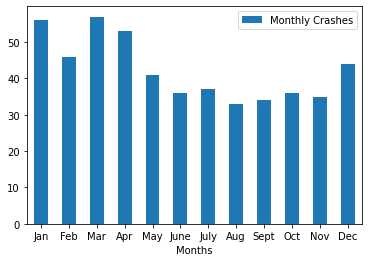

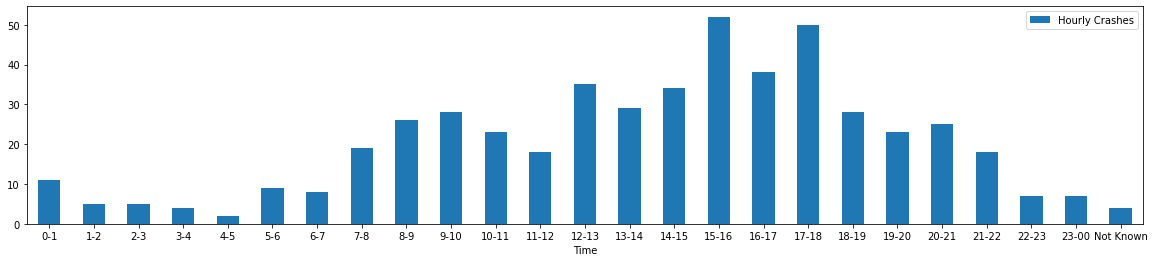

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns

#converting csv file into pandas DataFrame
data = pd.read_csv('Oregon Hwy 26 Crash Data for 2019 - Crashes on Hwy 26 during 2019.csv')
# print(data, "Number of Rows in Data: ", len(data))


#Breaking into dataframe based on record types

#record type 1 = crash details
CrashDF = data[data['Record Type'] == 1]
CrashesDF = CrashDF.dropna(axis=1, how='all')
#print(CrashesDF)


#record type 2 = vehicle details
VehiclesDF = data[data['Record Type'] == 2]
VehiclesDF = VehiclesDF.dropna(axis=1, how='all')
# print(VehiclesDF)

#record type 3 = people details
ParticipantsDF = data[data['Record Type'] == 3]
ParticipantsDF = ParticipantsDF.dropna(axis=1, how='all')
# print(ParticipantsDF)


# Existence assertion
CrashIDExist = CrashesDF['Crash ID']
for i in CrashIDExist.astype(str):
    if (len(i) != 7):
        print("Failed")
        break
print("Passed")
CrashIDExist = VehiclesDF['Vehicle ID']
for i in CrashIDExist:
    if (i <= 0):
        print("Failed")
print("Passed")


    
    
    
# Limit assertion
crashYearValue = float("2019")
for i in CrashesDF['Crash Year']:
    if(i == crashYearValue):
        continue
    else:
        print("Failed")
        break
print("Assertion passed for 'Crash Year'")
CrashMonth = CrashesDF['Crash Month'].between(1, 12, inclusive="both")
# print(CrashMonth.all())



# Intra-record assertion
for i in CrashesDF['Latitude Degrees']:
    if (CrashesDF.iloc[0]['Latitude Degrees'] <= 0):
        print("Failed")
        break
print("Passed")
        
degrees=CrashesDF['Latitude Degrees']
minutes=CrashesDF['Latitude Minutes']
seconds=CrashesDF['Latitude Seconds']
dataset={"Degrees":degrees,"Minutes":minutes,"Seconds":seconds}
df= pd.DataFrame(dataset)
lowLimit=41.00+0+0.0
highLimit=47+59+59.99
for row in df.iterrows():
    validData=row[1]['Degrees']+row[1]['Minutes']+row[1]['Seconds']
    if validData<=lowLimit and validData>=highLimit:
        print("Failed")
        break
print("Passed")

    
    


# Inter-record assertion
CrashesDF1=CrashesDF.drop_duplicates(['Crash ID'])
VehiclesDF1=VehiclesDF.drop_duplicates(['Crash ID'])
ParticipantsDF1=ParticipantsDF.drop_duplicates(['Crash ID'])
if (CrashesDF1.shape[0] == VehiclesDF1.shape[0] == ParticipantsDF1.shape[0]):
    print("Passed")
else:
    print("Failed")
VehicleCrash = VehiclesDF[['Crash ID', 'Vehicle ID']]
VehicleCrash = VehicleCrash.groupby(['Crash ID'])
VehicleCrash = VehicleCrash.count()
for i in VehicleCrash['Vehicle ID']:
    if(i <= 0):
        print("Failed")
        break
print("Passed")


# Summary assertion
CrashIDUnique = CrashesDF['Crash ID'].is_unique
DropDup = data['Crash ID'].drop_duplicates(keep="first")
CrashIDUnique = DropDup.is_unique
print(CrashIDUnique)
LatitudeDeg = CrashesDF['Latitude Degrees'].between(41, 46, inclusive="both")
print(LatitudeDeg.all())


#Statistical distribution assertion
MonthlyCrashes = CrashesDF[['Crash ID', 'Crash Month']]
MonthlyCrashes = MonthlyCrashes.groupby(['Crash Month'])
MonthlyCrashesCount = MonthlyCrashes.count()
YAxis = MonthlyCrashesCount['Crash ID'].tolist()
XAxis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
df = pd.DataFrame({'Months':XAxis, 'Monthly Crashes':YAxis})
ax = df.plot.bar(x='Months', y='Monthly Crashes', rot=0)

CrashHour = CrashesDF[['Crash ID', 'Crash Hour']]
CrashHour = CrashHour.groupby(['Crash Hour'])
CrashHourCount = CrashHour.count()
# print(CrashHourCount)
YAxis = CrashHourCount['Crash ID'].tolist()
XAxis = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16','16-17', '17-18', '18-19', '19-20', '20-21', '21-22','22-23','23-00', 'Not Known']
df1 = pd.DataFrame({'Time':XAxis, 'Hourly Crashes':YAxis})
ax1 = df1.interpolate().plot.bar(x='Time', y='Hourly Crashes', figsize=(20, 4), rot=0)

# Adding Crahes, Vehicles, Participants dataframe into different csv files
File1 = CrashesDF.to_csv('CrashesInfo.csv', mode='w', index=False, header=False)
File2 = VehiclesDF.to_csv('VehiclesInfo.csv', mode='w', index=False, header=False)
File3 = ParticipantsDF.to_csv('ParticipantsInfo.csv', mode='w', index=False, header=False)